In [1]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv("baitap.csv")
X = df.iloc[:, 0:2].values
df.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

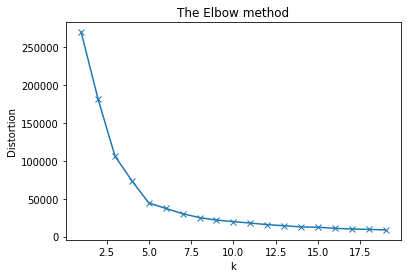

In [6]:
# find K

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow(X, fixed_k):
    distortions = []
    for k in fixed_k:
        cluster = KMeans(n_clusters=k)
        cluster.fit(X)
        distortions.append(cluster.inertia_)

    plt.plot(fixed_k, distortions, 'x-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow method')

elbow(X, range(1, 20))
# select K=8

In [7]:
K=8

In [8]:
# initialize random center points
def create_centers(X):
    indicates = np.random.randint(0, len(X), size=K)
    initial_centers = X[indicates]
    return initial_centers

centers = create_centers(X)
centers = {i: value for i, value in enumerate(centers)}
centers

{0: array([93, 90], dtype=int64),
 1: array([74, 72], dtype=int64),
 2: array([103,  85], dtype=int64),
 3: array([37, 26], dtype=int64),
 4: array([24, 73], dtype=int64)}

In [14]:
# find new center points

import copy

def fit(X, max_iter, epsilon, centers):
    count = 0
    while count < max_iter:
        features = {cluster: [] for cluster in range(K)}
        for x in X:
            distances = [np.linalg.norm(x - centers[center]) for center in centers]
            nearest = np.argmin(distances)
            features[nearest].append(x)
            
        old_centers = copy.deepcopy(centers)
        is_optimal = False
        for center in centers:
            centers[center] = np.mean(features[center], axis=0)
            if np.abs(centers[center] - old_centers[center]).all() < epsilon:
                is_optimal = True
    
        if is_optimal:
            break 
        count+=1
    return centers

centers = fit(X, max_iter=100, epsilon=1e-5, centers=centers)
centers

{0: array([86.53846154, 82.12820513]),
 1: array([55.2962963 , 49.51851852]),
 2: array([88.2       , 17.11428571]),
 3: array([26.30434783, 20.91304348]),
 4: array([25.72727273, 79.36363636])}

In [26]:
# use lib

K=8

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster = KMeans(n_clusters=K, init='k-means++') # k-means++, random
cluster.fit(X)

score = silhouette_score(X, cluster.labels_)
print("Score=", score)

Score= 0.4563394686110682
